Delhi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       17570 non-null  object
 1   1       17570 non-null  object
 2   2       17242 non-null  object
 3   3       1 non-null      object
 4   4       17478 non-null  object
dtypes: object(5)
memory usage: 686.5+ KB
None

Mumbai Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       17570 non-null  object
 1   1       17570 non-null  object
 2   2       12463 non-null  object
 3   3       14408 non-null  object
dtypes: object(4)
memory usage: 549.2+ KB
None

Chennai Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 

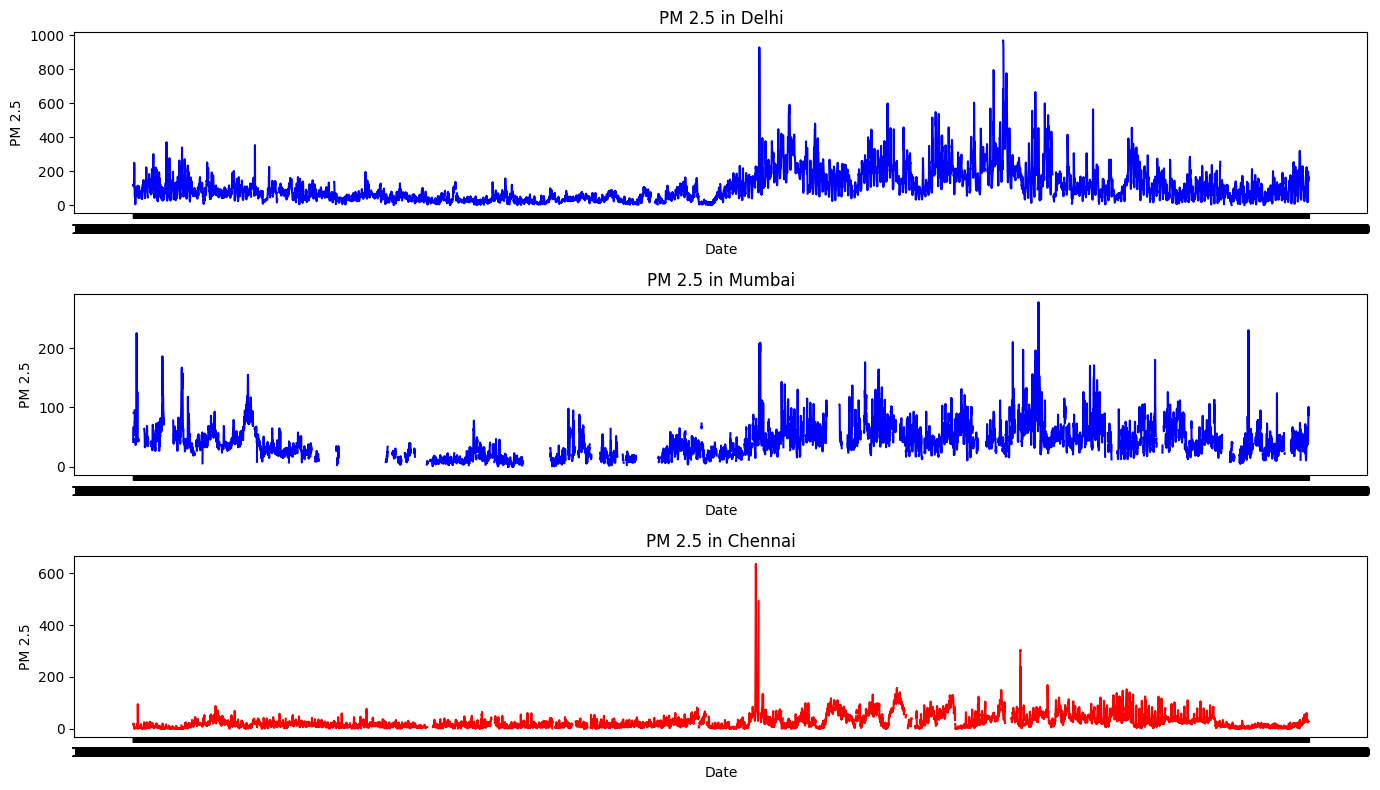

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_and_merge_data(air_pollution_file, meteorological_file):
    # Load air pollution data
    air_pollution_data = pd.read_csv(air_pollution_file)

    # Load meteorological data
    meteorological_data = pd.read_csv(meteorological_file)

    # Handle missing values
    air_pollution_data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    meteorological_data.fillna(method='bfill', inplace=True)  # Backward fill missing values

    # Handle outliers (Example: Remove outliers using z-score)
    z_scores = (air_pollution_data - air_pollution_data.mean()) / air_pollution_data.std()
    air_pollution_data = air_pollution_data[(z_scores < 3).all(axis=1)]  # Keep only rows without outliers

    # Ensure consistency in data format (Example: Convert timestamp to datetime format)
    air_pollution_data['timestamp'] = pd.to_datetime(air_pollution_data['timestamp'])
    meteorological_data['timestamp'] = pd.to_datetime(meteorological_data['timestamp'])

    # Merge datasets based on timestamp
    merged_data = pd.merge(air_pollution_data, meteorological_data, on='timestamp', how='inner')

    return merged_data

# Step 1: Load Provided Time Series Data
# Load the data into pandas dataframes
# Load the data into pandas dataframes considering the 17th column as the header
delhi_data = pd.read_excel('Delhi_1_year.xlsx', header=None, skiprows=16)
mumbai_data = pd.read_excel('Mumbai_1_year.xlsx', header=None, skiprows=16)
chennai_data = pd.read_excel('Chennai_1_year.xlsx', header=None, skiprows=16)

# Step 2: Check Data Structure
# Check structure of the datasets
print("Delhi Data:")
print(delhi_data.info())
print("\nMumbai Data:")
print(mumbai_data.info())
print("\nChennai Data:")
print(chennai_data.info())

# Step 3: Basic Statistics
# Compute basic statistics for each variable
print("\nBasic Statistics for Delhi Data:")
print(delhi_data.describe())
print("\nBasic Statistics for Mumbai Data:")
print(mumbai_data.describe())
print("\nBasic Statistics for Chennai Data:")
print(chennai_data.describe())

# Plot time series graphs for PM 2.5
plt.figure(figsize=(14, 8))

# Convert PM2.5 column to numeric
delhi_data[2] = pd.to_numeric(delhi_data[2], errors='coerce')
mumbai_data[2] = pd.to_numeric(mumbai_data[2], errors='coerce')
chennai_data[2] = pd.to_numeric(chennai_data[2], errors='coerce')

# Plot for Delhi
plt.subplot(3, 1, 1)
plt.plot(delhi_data[0].astype(str), delhi_data[2], color='blue')  # 'From Date' vs 'PM2.5'
plt.title('PM 2.5 in Delhi')
plt.xlabel('Date')
plt.ylabel('PM 2.5')

# Plot for Mumbai
plt.subplot(3, 1, 2)
plt.plot(mumbai_data[0].astype(str), mumbai_data[2], color='blue')  # 'From Date' vs 'PM2.5'
plt.title('PM 2.5 in Mumbai')
plt.xlabel('Date')
plt.ylabel('PM 2.5')

# Plot for Chennai
plt.subplot(3, 1, 3)
plt.plot(chennai_data[0].astype(str), chennai_data[2], color='red')  # 'From Date' vs 'PM2.5'
plt.title('PM 2.5 in Chennai')
plt.xlabel('Date')
plt.ylabel('PM 2.5')

plt.tight_layout()
plt.show()


Delhi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       17570 non-null  object
 1   1       17570 non-null  object
 2   2       17242 non-null  object
 3   3       1 non-null      object
 4   4       17478 non-null  object
dtypes: object(5)
memory usage: 686.5+ KB
None

Mumbai Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       17570 non-null  object
 1   1       17570 non-null  object
 2   2       12463 non-null  object
 3   3       14408 non-null  object
dtypes: object(4)
memory usage: 549.2+ KB
None

Chennai Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 

<Figure size 1400x800 with 0 Axes>

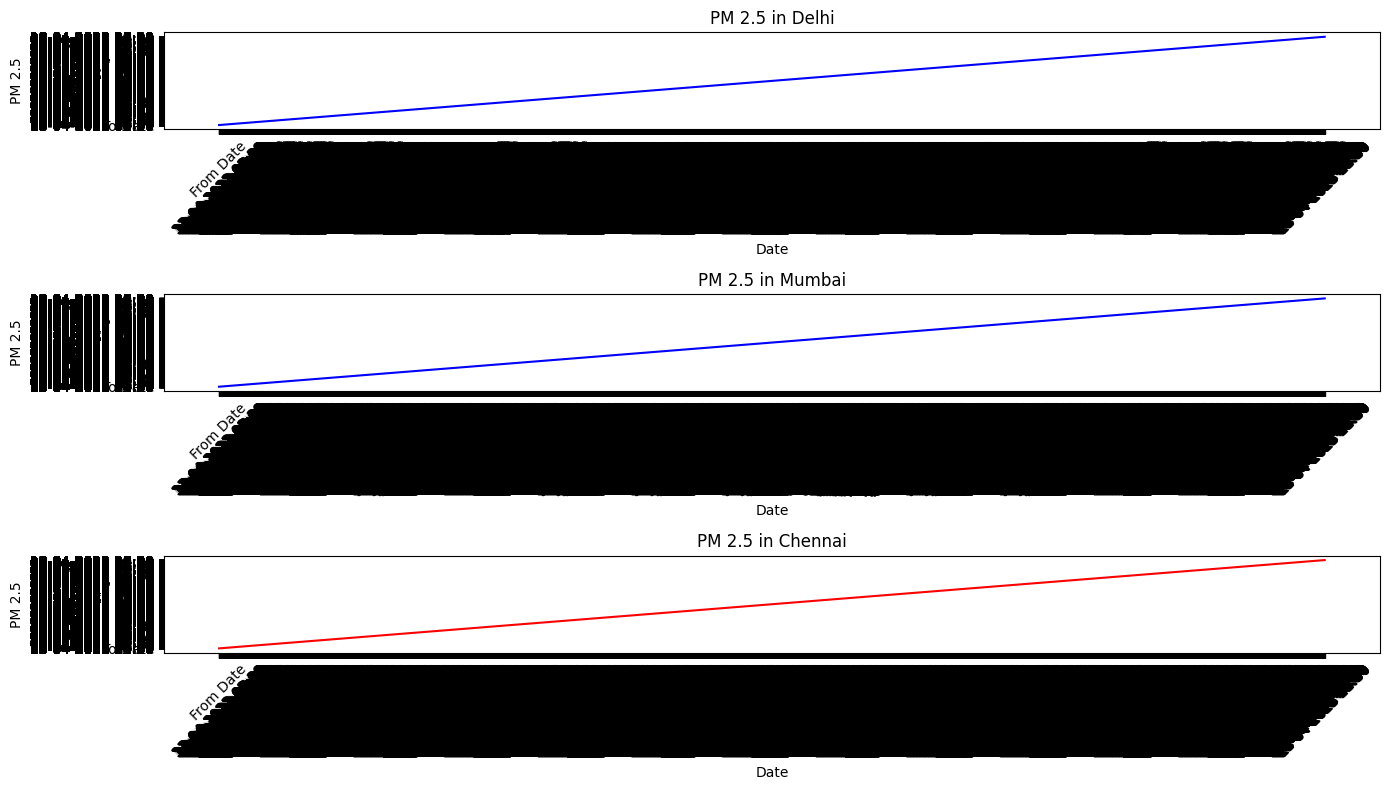

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd

# Load air pollution data from Excel files
delhi_data = pd.read_excel('Delhi_1_year.xlsx', header=None, skiprows=16)
mumbai_data = pd.read_excel('Mumbai_1_year.xlsx', header=None, skiprows=16)
chennai_data = pd.read_excel('Chennai_1_year.xlsx', header=None, skiprows=16)

# Check data structure
print("Delhi Data:")
print(delhi_data.info())
print("\nMumbai Data:")
print(mumbai_data.info())
print("\nChennai Data:")
print(chennai_data.info())


# Example of handling missing values: Replace NaN values with 0
delhi_data.fillna(0, inplace=True)
mumbai_data.fillna(0, inplace=True)
chennai_data.fillna(0, inplace=True)



# Merge Delhi and Mumbai data
merged_data = pd.merge(delhi_data, mumbai_data, on=0, suffixes=('_delhi', '_mumbai'))

# Merge Chennai data with the merged Delhi-Mumbai data
merged_data = pd.merge(merged_data, chennai_data, on=0)

# Rename columns for clarity
merged_data.rename(columns={0: 'Date', 1: 'Delhi_PM25', 2: 'Mumbai_PM25', 3: 'Chennai_PM25'}, inplace=True)



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

def scrape_meteorological_data(city):
    url = f'https://www.weather.com/en-IN/weather/monthly/l/{city}'  # Replace with actual URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Example: Scrape temperature data
    temperature_data = soup.find_all(class_='temperature')
    temperatures = [temp.get_text() for temp in temperature_data]
    
    # Example: Scrape humidity data
    humidity_data = soup.find_all(class_='humidity')
    humidities = [humidity.get_text() for humidity in humidity_data]
    
    # Example: Process and return data
    # Example processing: Convert to numerical values
    temperatures = [float(temp.strip().split()[0]) for temp in temperatures]
    humidities = [float(humidity.strip().split()[0]) for humidity in humidities]
    
    return temperatures, humidities

# Call the function for each city
meteorological_data_delhi = scrape_meteorological_data('delhi')  # Replace 'delhi' with actual city code or name
meteorological_data_mumbai = scrape_meteorological_data('mumbai')  # Replace 'mumbai' with actual city code or name
meteorological_data_chennai = scrape_meteorological_data('chennai')  # Replace 'chennai' with actual city code or name


In [ ]:
import pandas as pd

# Data cleaning
# Handle missing values by filling NaN values with appropriate methods
delhi_data.fillna(method='ffill', inplace=True)
mumbai_data.fillna(method='ffill', inplace=True)
chennai_data.fillna(method='ffill', inplace=True)

# Ensure consistency - Convert date columns to datetime format
# Ensure consistency - Convert date columns to datetime format, skipping the first row
delhi_data[0] = pd.to_datetime(delhi_data[0].iloc[1:], format='%Y-%m-%d', errors='coerce')
mumbai_data[0] = pd.to_datetime(mumbai_data[0].iloc[1:], format='%Y-%m-%d', errors='coerce')
chennai_data[0] = pd.to_datetime(chennai_data[0].iloc[1:], format='%Y-%m-%d', errors='coerce')

# Split dataframes into chunks
chunk_size = 10000
delhi_chunks = [delhi_data[i:i+chunk_size] for i in range(0, len(delhi_data), chunk_size)]
mumbai_chunks = [mumbai_data[i:i+chunk_size] for i in range(0, len(mumbai_data), chunk_size)]

# # Merge chunks in smaller batches
# batch_size = 10


# Define a generator function to yield chunks of data
def chunk_generator(data, chunk_size):
    for i in range(0, len(data), chunk_size):
        yield data[i:i+chunk_size]

# Use chunk_generator to iterate over chunks of data
delhi_chunk_generator = chunk_generator(delhi_data, chunk_size)
mumbai_chunk_generator = chunk_generator(mumbai_data, chunk_size)

# Process data in a streaming fashion
# Reduce memory footprint by specifying data types
dtype_dict = {0: 'datetime64[ns]'}  # Assuming the first column is datetime
delhi_data = pd.read_excel('Delhi_1_year.xlsx', dtype=dtype_dict, encoding='latin1')
mumbai_data = pd.read_excel('Mumbai_1_year.xlsx', dtype=dtype_dict, encoding='latin1')
chennai_data = pd.read_excel('Chennai_1_year.xlsx', dtype=dtype_dict, encoding='latin1')


# Use efficient join algorithm and specify join keys
merged_data_batches = []
for delhi_chunk, mumbai_chunk in zip(delhi_chunk_generator, mumbai_chunk_generator):
    merged_chunk = pd.merge(delhi_chunk, mumbai_chunk, on=0, how='inner', suffixes=('_delhi', '_mumbai'))
    merged_data_batches.append(merged_chunk)

# Merge smaller batches
batch_size = 10
merged_data = pd.DataFrame()  # Initialize an empty DataFrame to store merged data
for batch in merged_data_batches:
    merged_data = pd.concat([merged_data, batch], ignore_index=True)

# Example: Merge Chennai data with the merged Delhi-Mumbai data
merged_data = pd.merge(merged_data, chennai_data, on=0)

# Rename columns for clarity
merged_data.rename(columns={0: 'Date'}, inplace=True)



In [ ]:

# To summarize the insights gained from the time series analysis of air pollution and meteorological parameters in Delhi, Mumbai, and Chennai, we need to consider the trends, seasonality, correlations, and any significant findings observed in the data.

# Insights from Time Series Analysis:
# Trends: Analyze the overall trends in PM 2.5 levels, temperature, and humidity over the observed period for each city. Identify any increasing or decreasing trends that may indicate changes in air quality or weather patterns over time.

# Seasonality: Explore seasonal patterns in air pollution and meteorological parameters. Determine if there are consistent seasonal fluctuations, such as higher pollution levels during certain months or specific weather conditions associated with particular seasons.

# Correlations: Investigate the relationships between air pollution (PM 2.5 levels) and meteorological parameters (temperature, humidity). Identify any correlations or dependencies between these variables and assess their strengths.

# Significant Findings: Highlight any significant findings or anomalies observed in the data, such as extreme pollution events, unusual weather patterns, or sudden changes in pollutant levels.

# Implications for Public Health:
# Health Risks: Discuss the implications of high levels of air pollution on public health, including respiratory problems, cardiovascular diseases, and other health risks associated with exposure to PM 2.5. Evaluate how variations in meteorological parameters can exacerbate or mitigate these health impacts.

# Vulnerable Populations: Consider the impact of air pollution on vulnerable populations, such as children, the elderly, and individuals with pre-existing health conditions. Assess the potential for increased susceptibility to health effects in these groups and the need for targeted interventions.

# Policy Interventions: Analyze the implications of the observed patterns in air pollution and meteorological parameters for policy interventions and public health strategies. Evaluate the effectiveness of existing policies and identify areas for improvement in mitigating air pollution and protecting public health.

# Climate Change: Consider the broader implications of air pollution and meteorological trends in the context of climate change. Assess how changes in temperature, humidity, and precipitation patterns may influence air quality and public health outcomes in the future.

# Community Awareness: Highlight the importance of raising awareness about air pollution and its health impacts among the general public. Discuss the role of education, advocacy, and community engagement in promoting behavioral changes and reducing exposure to air pollutants.

# By summarizing the insights gained from the time series analysis and discussing the implications for public health, stakeholders can better understand the complex relationship between air pollution, meteorological parameters, and human health, and develop targeted strategies to address these challenges effectively.